<a href="https://colab.research.google.com/github/danhorsley/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Copy_of_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
def meanvarstd(sales):
  n = len(sales)
  av = sum(sales)/n
  var = sum([((x-av)**2)/(n-1) for x in sales])
  std = var**0.5
  
  return av,var,std

In [0]:
sales_wk1=[3505, 2400, 3027, 2798, 3700, 3250, 2689]

print('mean, variance and stand deviation respectively are :',meanvarstd(sales_wk1))

mean, variance and stand deviation respectively are : (3052.714285714286, 214387.90476190476, 463.02041505953576)


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
def my_covariance(list1,list2):
  av1 = sum(list1)/len(list1)
  av2 = sum(list2)/len(list2)
  cov = sum([(list1[i]-av1)*(list2[i]-av2)/(len(list1)-1) for i in range(0,len(list1))])
  
  return cov
  

In [0]:
cust_wk1=[127, 80, 105, 92, 120, 115, 93]

my_covariance(sales_wk1,cust_wk1)

7604.357142857143

In [0]:
#now to check - note numpy cov return matrix of variance and covraice so we jsut select teh covariance part
import numpy as np

np.cov(sales_wk1,cust_wk1)[0][1]

7604.357142857142

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
#finding standard deviation of customers

cust_std = meanvarstd(cust_wk1)[2]
cust_std

17.057326313123664

In [0]:
#correlation coefficient is just covariance divided by product of both individual standard deviations
sales_std = meanvarstd(sales_wk1)[2]
wk1_corr = my_covariance(sales_wk1,cust_wk1)/(sales_std*cust_std)
wk1_corr

0.9628339778148909

In [0]:
#now to check
np.corrcoef(sales_wk1,cust_wk1)[0][1]

0.9628339778148909

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [0]:
df.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

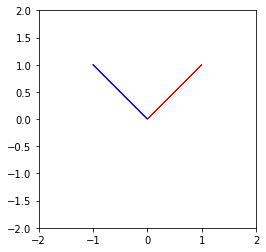

In [0]:
#a synonym for orthogonal is perpendicular
v1 = [1,1]
v2= [-1,1]
import matplotlib.pyplot as plt

plt.arrow(0,0,1,1,color='r')
plt.arrow(0,0,-1,1,color='b')
plt.xlim(-2,2)          
plt.ylim(-2,2)
plt.gca().set_aspect('equal', adjustable='box') #this is necessary to even up scales of axes


## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
a = np.matrix('-5;3;7')
b = np.matrix('6;-8;2')

np.dot(a.T,b)

matrix([[-40]])

they can't be orthogonal as their not product isn't 0

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = np.matrix('2,-15,6,20')
c_array = np.array([2,-15,6,20])

np.linalg.norm(c)**2, np.dot(c_array,c_array), np.dot(c,c.T)

(665.0, 665, matrix([[665]]))

In [0]:
#all answers are 665, i.e. the sum of the squares

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

$$|d| = \begin{vmatrix} 7 \\ 12 \end{vmatrix} = \sqrt{7^2 + 12^2} = \sqrt{193}$$  

so $$ d =|d|\hat{d} = \sqrt{193}\begin{bmatrix} 7/\sqrt{193} \\ 12/\sqrt{193}\end{bmatrix}$$

$$|e| = \begin{vmatrix} 2 \\ 11 \\-8 \end{vmatrix} = \sqrt{2^2 + 11^2+8^2} = \sqrt{189}$$  

so $$ e =|e|\hat{e} = \sqrt{189}\begin{bmatrix} 2/\sqrt{189} \\ 11/\sqrt{189}\\ -8/\sqrt{189}\end{bmatrix}$$

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f = np.matrix('4,12,11,9,2')
f_norm = np.linalg.norm(f)


f_unit = np.dot((1/f_norm),f)
f_unit

matrix([[0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167]])

In [0]:
#quick check that norm is 1
np.linalg.norm(f_unit)

0.9999999999999999

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

(0, 7)

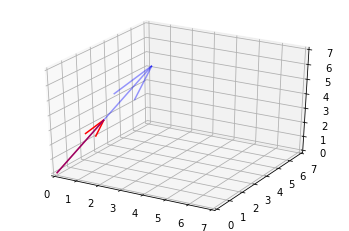

In [0]:
#first of all we plot two linearly dependent vectors
from mpl_toolkits.mplot3d import Axes3D
v3 = [1,2,3]
v4 = [2,4,6]

fig_dep = plt.figure()
ax_dep = fig_dep.add_subplot(111, projection='3d')

ax_dep.quiver(0, 0, 0, 2, 4, 6, color='b',length=1,alpha=0.4)
ax_dep.quiver(0, 0, 0, 1, 2, 3, color='r',length=1)


ax_dep.set_xlim([0, 7])
ax_dep.set_ylim([0, 7])
ax_dep.set_zlim([0, 7])

(0, 7)

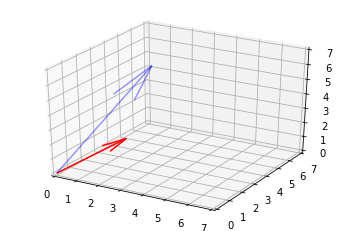

In [0]:
#fnow independent
from mpl_toolkits.mplot3d import Axes3D
v5 = [1,2,3]
v6 = [2,2,2]

fig_indep = plt.figure()
ax_indep = fig_indep.add_subplot(111, projection='3d')

ax_indep.quiver(0, 0, 0, 2, 4, 6, color='b',length=1,alpha=0.4)
ax_indep.quiver(0, 0, 0, 2, 2, 2, color='r',length=1)


ax_indep.set_xlim([0, 7])
ax_indep.set_ylim([0, 7])
ax_indep.set_zlim([0, 7])

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

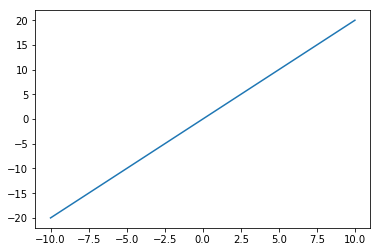

In [0]:
#these vectors are not linearly independent so the span is just the straight line containing both of them, i.e. y=2x

x=np.linspace(-10,10)
plt.plot(x,2*x)

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:

#here we find rank of teh matrix to determine number of linear independent vectors in the matrix of l,m,n
mat = np.matrix('1,-1,4;2,0,8;3,7,2')


In [2]:
np.linalg.matrix_rank(mat)

3

In [0]:
#so these vectors span the whole of R3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



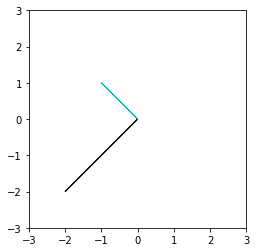

In [0]:
#a synonym for orthogonal is perpendicular


plt.arrow(0,0,-2,-2,color='k')
plt.arrow(0,0,-1,1,color='c')
plt.xlim(-3,3)          
plt.ylim(-3,3)
plt.gca().set_aspect('equal', adjustable='box') #this is necessary to even up scales of axes

## 6.2 What does it mean to form a basis?

form a basis means you can span the whole vector space, i.e. create any other vector out of a combination of your starting vectors and scalarrs

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [0]:
#the rank is 3
P = np.matrix('1,2,3;-1,0,7;4,8,2')
np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

that it's components are linearly independent and could span the n-space, or if it's a system of linear equation, then it is solvable,

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [0]:
#so we need to find the multiple of v where the perpendicular line from L goes through w.  let's call this c
# then v.(w-cv) = 0, reducing we get c = v.w/v.v

v = np.array([1,3])
w = np.array([-1,2])

c = np.dot(v,w)/np.dot(v,v)

c

0.5

In [0]:
#so our projection is the vector
cv = np.dot(c,v)
cv

array([0.5, 1.5])

In [0]:
#and our orthogonal vector is 
w-cv

array([-1.5,  0.5])

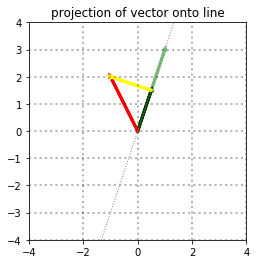

In [0]:
#plotting

w_minus_proj = w-cv

fig_p,ax_p = plt.subplots()
plt.xlim(-4,4)          
plt.ylim(-4,4)

# Get Vals for L
xx = np.array(ax_p.get_xlim())
yy = 3*xx

# Plot Vectors and L
ax_p.plot(xx, yy, ':', color='grey', linewidth=1)
ax_p.arrow(0, 0, cv[0], cv[1], linewidth=3, head_width=.05, head_length=0.05, color ='k')
ax_p.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green',alpha=0.5)
ax_p.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
ax_p.arrow(cv[0], cv[1], w_minus_proj[0], w_minus_proj[1], linewidth=3, head_width=.05, head_length=0.05, color = 'yellow')

ax_p.set_title("projection of vector onto line")
plt.grid(color='k', linestyle=':', linewidth=2,alpha=0.3)
ax_p.set_aspect('equal')
plt.show();

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

In [0]:
def find_proj(vect):
  v = np.array([1,1])
  w = vect
  c = np.dot(v,w)/np.dot(v,v)
  cv = np.dot(c,v)
  wminproj = w - cv
  return cv, wminproj

In [0]:
#testing it out on first val [1,4]

find_proj(np.array([1,4]))

(array([2.5, 2.5]), array([-1.5,  1.5]))

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()

In [0]:
points = [np.array([x_values[i],y_values[i]]) for i in range (0,len(x_values))]

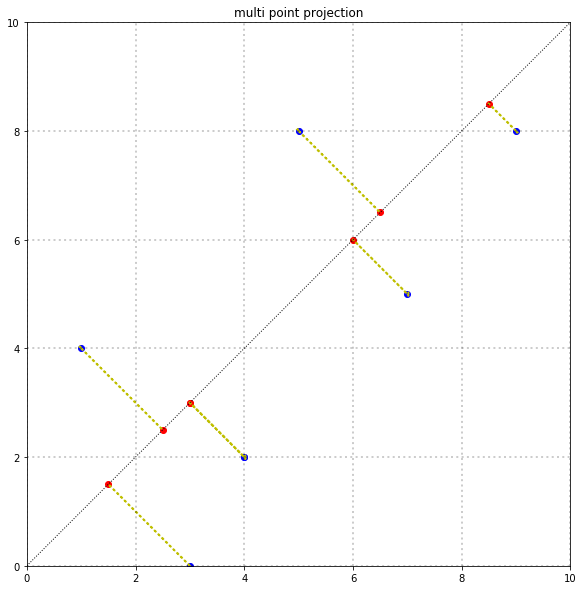

In [0]:
fig_m,ax_m = plt.subplots(figsize=(15, 10))
plt.xlim(0,10)          
plt.ylim(0,10)
xxx = np.array(ax_m.get_xlim())
yyy = xxx
ax_m.plot(xxx, yyy, ':', color='k', linewidth=1)

for point in points:
  cv,wminproj = find_proj(point)
  ax_m.scatter(cv[0],cv[1],color='r')
  ax_m.scatter(point[0],point[1],color='b')
  ax_m.arrow(cv[0], cv[1], wminproj[0], wminproj[1], linewidth=2, head_width=.05, head_length=0.05, linestyle=':',color = 'y')
  
ax_m.set_title("multi point projection")
plt.grid(color='k', linestyle=':', linewidth=2,alpha=0.2)
ax_m.set_aspect('equal')
plt.show();  